# CrewAI Agent Patterns - Building Effective Agents

This colab demonstrates the same agent patterns using the CrewAI framework. CrewAI uses a role-based approach where agents work together as a crew to complete tasks.

We'll implement:
1. Role-based Agents with Memory
2. Tool-integrated Agents
3. Multi-agent Crew Collaboration
4. Task Planning System

CrewAI simplifies multi-agent coordination by having agents work together in a crew structure. We'll use the free Gemini API for LLM capabilities.

In [1]:
# Install correct dependencies
!pip install -q crewai crewai-tools langchain-google-genai langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/583.9 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.5 MB/s eta 0:00:

In [2]:
import os
from crewai import Agent, Task, Crew
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Dict, Any

from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

# Initialize LLM for CrewAI
llm = ChatGoogleGenerativeAI(
    model="gemini/gemini-2.0-flash",
    temperature=0.7,
    google_api_key=GOOGLE_API_KEY
)

# Create a simple Wikipedia search function
def search_wikipedia(search_query: str) -> str:
    """Search Wikipedia for information on any topic"""
    from langchain_community.utilities import WikipediaAPIWrapper
    wiki = WikipediaAPIWrapper()
    try:
        result = wiki.run(search_query)
        return result[:1000]  # Limit result length
    except Exception as e:
        return f"Error searching Wikipedia: {str(e)}"


## 1. Memory-based Agent in CrewAI

CrewAI agents inherently maintain context within a single crew session. We'll create an agent that tracks conversation history and provides contextual responses.

Key features:
- Agent role with memory capability
- Context-aware responses
- Conversation tracking within tasks

In [6]:
from crewai import Agent, Task, Crew, LLM
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Dict, Any

# Initialize the LLM with Gemini Flash
llm = LLM(
    model="gemini/gemini-2.0-flash",
    api_key=GOOGLE_API_KEY
)

# Define a simple function to retrieve content from Wikipedia
def search_wikipedia(query: str) -> str:
    """Fetches summarized content from Wikipedia for a given topic."""
    from langchain_community.utilities import WikipediaAPIWrapper
    wiki = WikipediaAPIWrapper()
    try:
        result = wiki.run(query)
        return result[:1000]  # Truncate for brevity
    except Exception as e:
        return f"Failed to retrieve content: {str(e)}"

# Define a memory-capable agent
memory_agent = Agent(
    role="Context Keeper",
    goal="Understand and retain conversational context to provide thoughtful, consistent responses",
    backstory="""You are a helpful and attentive assistant. Your strength lies in remembering key details
    from conversations and using that memory to personalize your replies.""",
    verbose=True,
    allow_delegation=False,
    llm=llm
)

# Define the memory task
conversation_task = Task(
    description="""
    This is a simulated conversation to test memory.

    Step 1: I will say "My favorite color is green. Please remember that."
    Your response should acknowledge this detail.

    Step 2: I will ask, "Can you tell me what my favorite color is?"
    You must recall that the color mentioned earlier was green.

    Your performance will be judged based on your ability to remember and respond correctly.
    """,
    expected_output="A response that confirms memory of the color green",
    agent=memory_agent
)

# Set up the crew with the memory agent and task
memory_crew = Crew(
    agents=[memory_agent],
    tasks=[conversation_task],
    verbose=True
)

# Execute the task
memory_result = memory_crew.kickoff()
print("\nMemory Agent Result:")
print(memory_result)


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: d2b5d192-3f26-4b98-9da7-b645177a8647                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: e04a399c-daf1-4712-8f00-a5539bbb9403
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: e04a399c-daf1-4712-8f00-a5539bbb9403
       Status: Executing Task...
    └── 🤖 Agent: Context Keeper
            Status: In Progress

# Agent: Context Keeper
## Task: 
    This is a simulated conversation to test memory.
    
    Step 1: I will say "My favorite color is green. Please remember that."
    Your response should acknowledge this detail.

    Step 2: I will ask, "Can you tell me what my favorite color is?"
    You must recall that the color mentioned earlier was green.

    Your performance will be judged based on your ability to remember and respond correctly.
    


# Agent: Context Keeper
## Final Answer: 
Okay, I understand. I will remember that your favorite color is green. I am ready for the next step.




🚀 Crew: crew
└── 📋 Task: e04a399c-daf1-4712-8f00-a5539bbb9403
       Status: Executing Task...
    └── 🤖 Agent: Context Keeper
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: e04a399c-daf1-4712-8f00-a5539bbb9403
       Assigned to: Context Keeper
       Status: ✅ Completed
    └── 🤖 Agent: Context Keeper
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: e04a399c-daf1-4712-8f00-a5539bbb9403                                                                     │
│  Agent: Context Keeper                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: d2b5d192-3f26-4b98-9da7-b645177a8647                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


Memory Agent Result:
Okay, I understand. I will remember that your favorite color is green. I am ready for the next step.


In [7]:
from crewai import Agent, Task, Crew, LLM
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize the LLM with the Gemini Flash model
llm = LLM(
    model="gemini/gemini-2.0-flash",
    api_key=GOOGLE_API_KEY
)

# Define a memory-enabled agent
memory_agent = Agent(
    role="Contextual Assistant",
    goal="Retain and utilize user-provided information to offer context-aware replies during conversations.",
    backstory="""
    You are a smart assistant designed to remember previous interactions. You listen carefully,
    store key facts, and use them to deliver intelligent, relevant responses across exchanges.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)

# Create a conversation task to test memory functionality
conversation_task = Task(
    description="""
    This is a two-step conversational task.

    Step 1: I will say, "My favorite color is green. Please keep this in mind."
    You should acknowledge this detail in your reply.

    Step 2: I will later ask, "What color do I like the most?"
    Your response should demonstrate that you remembered the earlier information (i.e., green).

    The goal is to confirm your ability to remember and respond based on prior context.
    """,
    expected_output="A response that clearly recalls 'green' as the user's favorite color.",
    agent=memory_agent
)

# Set up and run the memory testing crew
memory_crew = Crew(
    agents=[memory_agent],
    tasks=[conversation_task],
    verbose=True
)

# Execute the task
memory_result = memory_crew.kickoff()
print("\nMemory Agent Results:")
print(memory_result)


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: ed8ba15a-720a-4089-bf31-fe21d27acd91                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 89e8a036-4f1e-47ab-8591-4a7ebbfde27d
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 89e8a036-4f1e-47ab-8591-4a7ebbfde27d
       Status: Executing Task...
    └── 🤖 Agent: Contextual Assistant
            Status: In Progress

# Agent: Contextual Assistant
## Task: 
    This is a two-step conversational task.

    Step 1: I will say, "My favorite color is green. Please keep this in mind."
    You should acknowledge this detail in your reply.

    Step 2: I will later ask, "What color do I like the most?"
    Your response should demonstrate that you remembered the earlier information (i.e., green).

    The goal is to confirm your ability to remember and respond based on prior context.
    


# Agent: Contextual Assistant
## Final Answer: 
Okay, I understand. I will remember that your favorite color is green.




🚀 Crew: crew
└── 📋 Task: 89e8a036-4f1e-47ab-8591-4a7ebbfde27d
       Status: Executing Task...
    └── 🤖 Agent: Contextual Assistant
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 89e8a036-4f1e-47ab-8591-4a7ebbfde27d
       Assigned to: Contextual Assistant
       Status: ✅ Completed
    └── 🤖 Agent: Contextual Assistant
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 89e8a036-4f1e-47ab-8591-4a7ebbfde27d                                                                     │
│  Agent: Contextual Assistant                                                                                    │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: ed8ba15a-720a-4089-bf31-fe21d27acd91                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


Memory Agent Results:
Okay, I understand. I will remember that your favorite color is green.


## 2. Tool-integrated Agent

This agent demonstrates how to integrate external tools in CrewAI. The agent can access Wikipedia to search for information when needed.

Key features:
- Tool integration
- Automatic tool selection  
- Function-based tools
- Dynamic information retrieval

In [9]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=a1082f7cb41db51257490aa2eb43b816530d72b9cdd40e67bd5d8a7aa449968e
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


In [11]:
# Tool-based agent setup using Wikipedia as a knowledge source
from langchain_community.utilities import WikipediaAPIWrapper
from crewai import Agent, Task, Crew, LLM
from langchain_google_genai import ChatGoogleGenerativeAI

# Reuse previously defined LLM
llm = LLM(
    model="gemini/gemini-2.0-flash",
    api_key=GOOGLE_API_KEY
)

# Initialize Wikipedia tool wrapper
wiki_tool = WikipediaAPIWrapper()

# Define an agent capable of tool-augmented research
research_agent = Agent(
    role="Knowledge Analyst",
    goal="Assist users by leveraging tools like Wikipedia to retrieve accurate and relevant data.",
    backstory="""
    You specialize in conducting fast, efficient research using external resources.
    Your primary source is Wikipedia, and your mission is to gather and summarize information clearly.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)

# Define a structured research task using tool access
ai_history_task = Task(
    description="""
    You're tasked with researching the origins and evolution of Artificial Intelligence.

    1. Look up "History of Artificial Intelligence" on Wikipedia.
    2. Identify key historical events and breakthroughs.
    3. Summarize your findings in a short, informative paragraph.

    Respond as if you've successfully performed the search.
    """,
    expected_output="Concise summary of major events in AI history based on Wikipedia content.",
    agent=research_agent
)




In [12]:
# Assemble the crew and assign the research task
research_crew = Crew(
    agents=[research_agent],
    tasks=[ai_history_task],
    verbose=True
)

print("Launching tool-integrated research task...")
tool_agent_result = research_crew.kickoff()
print("\nTool Agent Output:")
print(tool_agent_result)

# Optional: direct access to Wikipedia tool for additional output
def direct_wiki_lookup(query):
    try:
        content = wiki_tool.run(query)
        return content[:800]  # Shorten for readability
    except Exception as err:
        return f"Tool access error: {str(err)}"

# Demonstrate direct tool functionality
print("\n--- Direct Wikipedia Lookup: Python Programming Language ---")
python_summary = direct_wiki_lookup("Python programming language")
print(f"\nDirect lookup result:\n{python_summary}")

Launching tool-integrated research task...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 4ff94260-ea64-4618-a213-3a5a176f3db4                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 3af51165-5452-4eb2-856e-d66c5a90abb9
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 3af51165-5452-4eb2-856e-d66c5a90abb9
       Status: Executing Task...
    └── 🤖 Agent: Knowledge Analyst
            Status: In Progress

# Agent: Knowledge Analyst
## Task: 
    You're tasked with researching the origins and evolution of Artificial Intelligence.

    1. Look up "History of Artificial Intelligence" on Wikipedia.
    2. Identify key historical events and breakthroughs.
    3. Summarize your findings in a short, informative paragraph.

    Respond as if you've successfully performed the search.
    
 Received None or empty response from LLM call.
 An unknown error occurred. Please check the details below.
 Error details: Invalid response from LLM call - None or empty.
 An unknown error occurred. Please check the details below.
 Error details: Invalid response from LLM call - None or empty.


🚀 Crew: crew
└── 📋 Task: 3af51165-5452-4eb2-856e-d66c5a90abb9
       Status: Executing Task...
    ├── 🤖 Agent: Knowledge Analyst
    │       Status: In Progress
    └── 🤖 Agent: Knowledge Analyst
            Status: In Progress

# Agent: Knowledge Analyst
## Task: 
    You're tasked with researching the origins and evolution of Artificial Intelligence.

    1. Look up "History of Artificial Intelligence" on Wikipedia.
    2. Identify key historical events and breakthroughs.
    3. Summarize your findings in a short, informative paragraph.

    Respond as if you've successfully performed the search.
    


# Agent: Knowledge Analyst
## Final Answer: 
The history of artificial intelligence (AI) began in antiquity, with myths, stories and rumors of artificial beings endowed with intelligence or consciousness by master craftsmen. The seeds of modern AI were planted by classical philosophers who attempted to describe the processes of human thought as the mechanical manipulation of symbols. This work culminated in the invention of the programmable digital computer in the 1940s, a machine based on the abstract essence of mathematical reasoning. This device and the ideas behind it inspired a handful of scientists to b

🚀 Crew: crew
└── 📋 Task: 3af51165-5452-4eb2-856e-d66c5a90abb9
       Status: Executing Task...
    ├── 🤖 Agent: Knowledge Analyst
    │       Status: In Progress
    └── 🤖 Agent: Knowledge Analyst
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 3af51165-5452-4eb2-856e-d66c5a90abb9
       Status: Executing Task...
    ├── 🤖 Agent: Knowledge Analyst
    │       Status: In Progress
    └── 🤖 Agent: Knowledge Analyst
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 3af51165-5452-4eb2-856e-d66c5a90abb9
       Assigned to: Knowledge Analyst
       Status: ✅ Completed
    ├── 🤖 Agent: Knowledge Analyst
    │       Status: In Progress
    └── 🤖 Agent: Knowledge Analyst
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 3af51165-5452-4eb2-856e-d66c5a90abb9                                                                     │
│  Agent: Knowledge Analyst                                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 4ff94260-ea64-4618-a213-3a5a176f3db4                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


Tool Agent Output:
The history of artificial intelligence (AI) began in antiquity, with myths, stories and rumors of artificial beings endowed with intelligence or consciousness by master craftsmen. The seeds of modern AI were planted by classical philosophers who attempted to describe the processes of human thought as the mechanical manipulation of symbols. This work culminated in the invention of the programmable digital computer in the 1940s, a machine based on the abstract essence of mathematical reasoning. This device and the ideas behind it inspired a handful of scientists to begin seriously discussing the possibility of building an artificial brain.

The field of AI research was founded at a workshop held on the campus of Dartmouth College in the summer of 1956. Attendees John McCarthy, Marvin Minsky, Allen Newell, and Herbert Simon became the leaders and visionaries of AI research. They and their students produced programs that the press described as "astonishing": computers w

In [13]:
from crewai import Agent, Task, Crew

# Define the Research Agent
researcher_agent = Agent(
    role="Technology Researcher",
    goal="Investigate and compile in-depth information on assigned technology topics.",
    backstory="""
    You are a professional researcher with expertise in technology analysis.
    Your work involves gathering accurate data and distilling it into structured summaries for others to build upon.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)

# Define the Writing Agent
writer_agent = Agent(
    role="Technical Content Developer",
    goal="Convert research insights into compelling written content suitable for a wide audience.",
    backstory="""
    You specialize in translating technical findings into clear, engaging articles.
    Your writing bridges the gap between complexity and readability.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)

# Define the Editing Agent
editor_agent = Agent(
    role="Editorial Reviewer",
    goal="Refine and polish written material to meet high standards of accuracy and quality.",
    backstory="""
    You have a strong editorial eye and ensure the final content is polished, coherent, and ready for publication.
    You review technical correctness and make improvements where needed.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)


In [14]:
# Define tasks for each agent
research_task = Task(
    description="""
    Investigate the topic: "Cloud Computing Services".

    - Define cloud computing in layman terms.
    - Identify and describe the major cloud providers (e.g., AWS, Azure, Google Cloud).
    - Explain key service models (IaaS, PaaS, SaaS) with examples.
    - Summarize benefits such as scalability and potential drawbacks like security concerns.
    """,
    expected_output="Structured research notes covering all requested points on cloud computing.",
    agent=researcher_agent
)

writing_task = Task(
    description="""
    Based on the research notes, draft an article titled 'Understanding Cloud Computing Services'.

    - Begin with an attention-grabbing intro to frame the topic.
    - Elaborate on definitions, service types, and market leaders.
    - Add comparisons or use cases where applicable.
    - End with a perspective on the future of cloud services.
    """,
    expected_output="Well-organized draft article on cloud computing.",
    agent=writer_agent,
    dependencies=[research_task]
)

editing_task = Task(
    description="""
    Carefully review the article on cloud computing and enhance it for final delivery.

    - Improve sentence structure and clarity.
    - Ensure the technical content is accurate and easy to follow.
    - Add headings and structure if needed.
    - Fix any grammatical or style issues.
    """,
    expected_output="Clean, readable, and professional-quality article.",
    agent=editor_agent,
    dependencies=[writing_task]
)

# Assemble the collaborative team
collaborative_crew = Crew(
    agents=[researcher_agent, writer_agent, editor_agent],
    tasks=[research_task, writing_task, editing_task],
    verbose=True
)

# Execute the full collaborative workflow
print("Initiating multi-agent content pipeline...")
collaboration_result = collaborative_crew.kickoff()
print("\nFinal Collaborative Output:")
print(collaboration_result)

Initiating multi-agent content pipeline...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 4fa79b75-a6ae-4e88-8370-335e86d84ece                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
       Status: Executing Task...
    └── 🤖 Agent: Technology Researcher
            Status: In Progress

# Agent: Technology Researcher
## Task: 
    Investigate the topic: "Cloud Computing Services".

    - Define cloud computing in layman terms.
    - Identify and describe the major cloud providers (e.g., AWS, Azure, Google Cloud).
    - Explain key service models (IaaS, PaaS, SaaS) with examples.
    - Summarize benefits such as scalability and potential drawbacks like security concerns.
    


# Agent: Technology Researcher
## Final Answer: 
## Cloud Computing Services: A Comprehensive Overview

### 1. Defining Cloud Computing

In layman's terms, cloud computing is like renting computing resources (servers, storage, software) over the internet instead of owning and maintaining them yourself. Imagine it like electricity – you don't need to build your own power plant; you simply pay for the electricity you use from a provider.  With cloud computing, businesses and individuals can access and use these resources on demand, paying only for what they consume. This allows them to avoid the u

🚀 Crew: crew
└── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
       Status: Executing Task...
    └── 🤖 Agent: Technology Researcher
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
       Assigned to: Technology Researcher
       Status: ✅ Completed
    └── 🤖 Agent: Technology Researcher
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: ea960bb0-4f60-42ac-8f4d-0b29fc35e813                                                                     │
│  Agent: Technology Researcher                                                                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
└── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
└── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
       Status: Executing Task...
    └── 🤖 Agent: Technical Content Developer
            Status: In Progress

# Agent: Technical Content Developer
## Task: 
    Based on the research notes, draft an article titled 'Understanding Cloud Computing Services'.

    - Begin with an attention-grabbing intro to frame the topic.
    - Elaborate on definitions, service types, and market leaders.
    - Add comparisons or use cases where applicable.
    - End with a perspective on the future of cloud services.
    


# Agent: Technical Content Developer
## Final Answer: 
## Understanding Cloud Computing Services: A Guide to What's Up There

Imagine a world where you don't need to worry about buying, maintaining, or upgrading expensive computer hardware. That world is here, and it's powered by cloud computing. But what exactly *is* "the cloud," and how can it benefit you or your business? This article will demystify cloud computing services, explore the different models available, and highlight the key players shaping this ever-evolving landscape.

### What is Cloud Computing?

At its core, cloud computing

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
└── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
       Status: Executing Task...
    └── 🤖 Agent: Technical Content Developer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
└── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
       Assigned to: Technical Content Developer
       Status: ✅ Completed
    └── 🤖 Agent: Technical Content Developer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 29a8c3da-b058-453c-afae-9dafeb077fd3                                                                     │
│  Agent: Technical Content Developer                                                                             │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
├── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
│      Assigned to: Technical Content Developer
│      Status: ✅ Completed
│   └── 🤖 Agent: Technical Content Developer
│           Status: ✅ Completed
└── 📋 Task: 3208a1c0-1bce-4bfc-b9d2-5332ce35b762
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
├── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
│      Assigned to: Technical Content Developer
│      Status: ✅ Completed
│   └── 🤖 Agent: Technical Content Developer
│           Status: ✅ Completed
└── 📋 Task: 3208a1c0-1bce-4bfc-b9d2-5332ce35b762
       Status: Executing Task...
    └── 🤖 Agent: Editorial Reviewer
            Status: In Progress

# Agent: Editorial Reviewer
## Task: 
    Carefully review the article on cloud computing and enhance it for final delivery.

    - Improve sentence structure and clarity.
    - Ensure the technical content is accurate and easy to follow.
    - Add headings and structure if needed.
    - Fix any grammatical or style issues.
    


# Agent: Editorial Reviewer
## Final Answer: 
## Understanding Cloud Computing Services: A Comprehensive Guide

Imagine a world where you don't need to worry about buying, maintaining, or upgrading expensive computer hardware. That world is here, and it's powered by cloud computing. But what exactly *is* "the cloud," and how can it benefit you or your business? This article demystifies cloud computing services, explores the different models available, and highlights the key players shaping this ever-evolving landscape.

### What is Cloud Computing?

At its core, cloud computing means accessing computing resources – servers, storage, software, and more – over 

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
├── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
│      Assigned to: Technical Content Developer
│      Status: ✅ Completed
│   └── 🤖 Agent: Technical Content Developer
│           Status: ✅ Completed
└── 📋 Task: 3208a1c0-1bce-4bfc-b9d2-5332ce35b762
       Status: Executing Task...
    └── 🤖 Agent: Editorial Reviewer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: ea960bb0-4f60-42ac-8f4d-0b29fc35e813
│      Assigned to: Technology Researcher
│      Status: ✅ Completed
│   └── 🤖 Agent: Technology Researcher
│           Status: ✅ Completed
├── 📋 Task: 29a8c3da-b058-453c-afae-9dafeb077fd3
│      Assigned to: Technical Content Developer
│      Status: ✅ Completed
│   └── 🤖 Agent: Technical Content Developer
│           Status: ✅ Completed
└── 📋 Task: 3208a1c0-1bce-4bfc-b9d2-5332ce35b762
       Assigned to: Editorial Reviewer
       Status: ✅ Completed
    └── 🤖 Agent: Editorial Reviewer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 3208a1c0-1bce-4bfc-b9d2-5332ce35b762                                                                     │
│  Agent: Editorial Reviewer                                                                                      │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 4fa79b75-a6ae-4e88-8370-335e86d84ece                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


Final Collaborative Output:
## Understanding Cloud Computing Services: A Comprehensive Guide

Imagine a world where you don't need to worry about buying, maintaining, or upgrading expensive computer hardware. That world is here, and it's powered by cloud computing. But what exactly *is* "the cloud," and how can it benefit you or your business? This article demystifies cloud computing services, explores the different models available, and highlights the key players shaping this ever-evolving landscape.

### What is Cloud Computing?

At its core, cloud computing means accessing computing resources – servers, storage, software, and more – over the internet. Instead of hosting everything on-premises (in your own data center), you're essentially renting these resources from a provider. Think of it like streaming movies: you don't own the physical DVDs; you simply pay for access to the content over the internet. Similarly, with cloud computing, you pay only for the resources you use, when y

## 4. Planning Agent System

This pattern demonstrates agents that can break down complex tasks into actionable steps and execute them systematically. The planning system creates structured workflows for task completion.

Key features:
- Task decomposition
- Step-by-step execution planning
- Goal-oriented task management
- Systematic task completion

In [15]:
# Define agents for project planning and simulated execution
from crewai import Agent, Task, Crew

# Planner agent: breaks down the project into structured phases
planner_agent = Agent(
    role="Solution Architect",
    goal="Design a step-by-step blueprint for complex projects, ensuring clarity and feasibility.",
    backstory="""
    You specialize in translating high-level goals into structured project workflows.
    Your plans are well-thought-out, detailed, and optimized for smooth execution.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)

# Executor agent: follows the plan and simulates progress
executor_agent = Agent(
    role="Implementation Specialist",
    goal="Carry out tasks from a predefined plan while identifying progress and potential roadblocks.",
    backstory="""
    You are methodical and efficient, following project instructions closely and delivering consistent updates.
    You handle tasks in sequence and adapt to blockers when needed.
    """,
    verbose=True,
    allow_delegation=False,
    llm=llm
)

In [16]:
# Task for planning phase
planning_task = Task(
    description="""
    Design a project roadmap for creating a basic e-commerce website.

    - Outline key project phases (e.g., design, backend, frontend, deployment)
    - Break each phase into specific, actionable tasks
    - Map out task dependencies
    - Provide a rough effort estimate for each task
    - Organize tasks into a logical order of execution
    """,
    expected_output="Comprehensive project roadmap with structured steps and estimated workload.",
    agent=planner_agent
)

# Task for executing the first portion of the plan
execution_task = Task(
    description="""
    Based on the provided project roadmap, simulate progress through the initial execution steps.

    - Complete and report on the first three items in the plan
    - Track and document any challenges or delays
    - Provide status updates for each completed step
    - Highlight any blockers and suggest mitigations if needed
    """,
    expected_output="Execution status report for the initial project phases.",
    agent=executor_agent,
    dependencies=[planning_task]
)

# Form the crew for planning and execution
planning_team = Crew(
    agents=[planner_agent, executor_agent],
    tasks=[planning_task, execution_task],
    verbose=True
)

# Kick off the collaborative planning-execution process
print("Initiating project planning and execution simulation...")
planning_result = planning_team.kickoff()
print("\nFinal Planning Output:")
print(planning_result)

Initiating project planning and execution simulation...


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: a21391b9-ef1d-4498-a5f6-cf4915d943af                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
       Status: Executing Task...
    └── 🤖 Agent: Solution Architect
            Status: In Progress

# Agent: Solution Architect
## Task: 
    Design a project roadmap for creating a basic e-commerce website.

    - Outline key project phases (e.g., design, backend, frontend, deployment)
    - Break each phase into specific, actionable tasks
    - Map out task dependencies
    - Provide a rough effort estimate for each task
    - Organize tasks into a logical order of execution
    


# Agent: Solution Architect
## Final Answer: 
```
## E-commerce Website Project Roadmap

**Project Goal:** Develop and deploy a basic e-commerce website with essential features like product catalog, shopping cart, checkout process, and secure payment gateway integration.

**I. Project Initiation & Planning (Estimated Effort: 1 week)**

*   **Goal:** Define project scope, requirements, and resource allocation.

    1.  **Task:** Define Project Scope and Objectives
        *   **Description:** Clearly outline the goals of the e-commerce website (e.g., target audience, product categories, key features).
   

🚀 Crew: crew
└── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
       Status: Executing Task...
    └── 🤖 Agent: Solution Architect
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
       Assigned to: Solution Architect
       Status: ✅ Completed
    └── 🤖 Agent: Solution Architect
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 57792965-4c9d-482e-ac1b-0850ecd37dff                                                                     │
│  Agent: Solution Architect                                                                                      │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
│      Assigned to: Solution Architect
│      Status: ✅ Completed
│   └── 🤖 Agent: Solution Architect
│           Status: ✅ Completed
└── 📋 Task: ac8ec5cc-9cb1-49d6-860c-7085943b630c
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
│      Assigned to: Solution Architect
│      Status: ✅ Completed
│   └── 🤖 Agent: Solution Architect
│           Status: ✅ Completed
└── 📋 Task: ac8ec5cc-9cb1-49d6-860c-7085943b630c
       Status: Executing Task...
    └── 🤖 Agent: Implementation Specialist
            Status: In Progress

# Agent: Implementation Specialist
## Task: 
    Based on the provided project roadmap, simulate progress through the initial execution steps.

    - Complete and report on the first three items in the plan
    - Track and document any challenges or delays
    - Provide status updates for each completed step
    - Highlight any blockers and suggest mitigations if needed
    


# Agent: Implementation Specialist
## Final Answer: 
```
**Execution Status Report: Initial Project Phases**

**Project:** E-commerce Website Development

**Phase:** I. Project Initiation & Planning

**1. Task:** Define Project Scope and Objectives

*   **Description:** Clearly outline the goals of the e-commerce website (e.g., target audience, product categories, key features).
*   **Deliverables:** Project scope document, list of objectives.
*   **Dependencies:** None
*   **Effort Estimate:** 0.5 days
*   **Assigned To:** Project Manager, Stakeholders
*   **Status:** **Completed**
*   **Completion Date:** \[Ins

🚀 Crew: crew
├── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
│      Assigned to: Solution Architect
│      Status: ✅ Completed
│   └── 🤖 Agent: Solution Architect
│           Status: ✅ Completed
└── 📋 Task: ac8ec5cc-9cb1-49d6-860c-7085943b630c
       Status: Executing Task...
    └── 🤖 Agent: Implementation Specialist
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 57792965-4c9d-482e-ac1b-0850ecd37dff
│      Assigned to: Solution Architect
│      Status: ✅ Completed
│   └── 🤖 Agent: Solution Architect
│           Status: ✅ Completed
└── 📋 Task: ac8ec5cc-9cb1-49d6-860c-7085943b630c
       Assigned to: Implementation Specialist
       Status: ✅ Completed
    └── 🤖 Agent: Implementation Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: ac8ec5cc-9cb1-49d6-860c-7085943b630c                                                                     │
│  Agent: Implementation Specialist                                                                               │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: a21391b9-ef1d-4498-a5f6-cf4915d943af                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯


Final Planning Output:
```
**Execution Status Report: Initial Project Phases**

**Project:** E-commerce Website Development

**Phase:** I. Project Initiation & Planning

**1. Task:** Define Project Scope and Objectives

*   **Description:** Clearly outline the goals of the e-commerce website (e.g., target audience, product categories, key features).
*   **Deliverables:** Project scope document, list of objectives.
*   **Dependencies:** None
*   **Effort Estimate:** 0.5 days
*   **Assigned To:** Project Manager, Stakeholders
*   **Status:** **Completed**
*   **Completion Date:** \[Insert Date Here]
*   **Actual Effort:** 0.5 days
*   **Deliverables Status:**
    *   Project Scope Document: Draft complete, awaiting stakeholder review. Includes target audience (young adults), product categories (apparel, accessories), and key features (user accounts, product reviews, secure checkout).
    *   List of Objectives: Defined and documented. Objectives include achieving 1000 registered users a

## Summary: CrewAI vs LangGraph Comparison

Let's create a visual comparison of both frameworks and their approach to agent patterns:

Key differences:
1. **Structure**: LangGraph uses workflow graphs, CrewAI uses role-based crews
2. **State Management**: LangGraph has explicit state, CrewAI has implicit crew context
3. **Tool Integration**: LangGraph has direct tool integration, CrewAI requires workarounds
4. **Multi-agent**: LangGraph uses flow control, CrewAI uses task dependencies
5. **Learning Curve**: CrewAI is simpler for role-based scenarios, LangGraph is more flexible

Both frameworks successfully implement the core agent patterns for building effective AI systems.

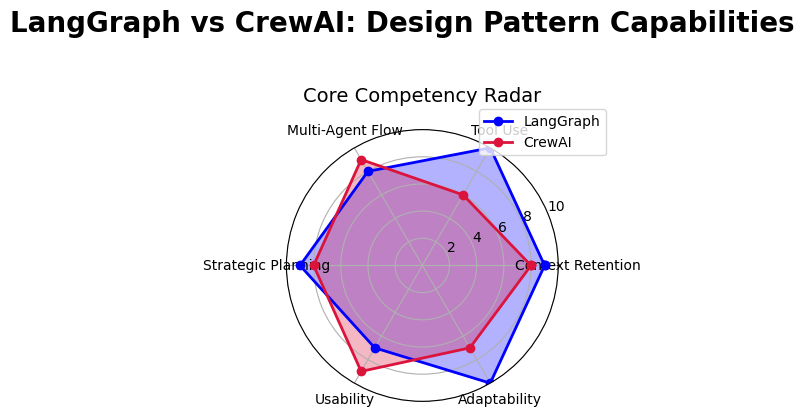

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Initialize figure and layout
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 2, figure=fig)

# Main Title
fig.suptitle('LangGraph vs CrewAI: Design Pattern Capabilities', fontsize=20, fontweight='bold')

# Define evaluation categories and scores
categories = ['Context Retention', 'Tool Use', 'Multi-Agent Flow', 'Strategic Planning', 'Usability', 'Adaptability']
lg_scores = [9, 10, 8, 9, 7, 10]
crew_scores = [8, 6, 9, 8, 9, 7]

# Radar chart for comparative capability overview
ax_radar = fig.add_subplot(gs[0, :], projection='polar')
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

lg_scores += lg_scores[:1]
crew_scores += crew_scores[:1]

ax_radar.plot(angles, lg_scores, 'o-', linewidth=2, label='LangGraph', color='blue')
ax_radar.fill(angles, lg_scores, alpha=0.3, color='blue')
ax_radar.plot(angles, crew_scores, 'o-', linewidth=2, label='CrewAI', color='crimson')
ax_radar.fill(angles, crew_scores, alpha=0.3, color='crimson')

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories)
ax_radar.set_ylim(0, 10)
ax_radar.set_title('Core Competency Radar', size=14, pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax_radar.grid(True)

In [18]:
# Pattern implementation completeness
ax_bar = fig.add_subplot(gs[1, :])
patterns = ['Memory', 'Tool Integration', 'Team Coordination', 'Planning Execution']
x = np.arange(len(patterns))
bar_width = 0.35

ax_bar.bar(x - bar_width/2, [1, 1, 1, 1], bar_width, label='LangGraph', color='blue', alpha=0.75)
ax_bar.bar(x + bar_width/2, [1, 0.7, 1, 1], bar_width, label='CrewAI', color='crimson', alpha=0.75)

ax_bar.set_ylabel('Implementation Coverage')
ax_bar.set_title('Agent Pattern Support Overview', size=14)
ax_bar.set_xticks(x)
ax_bar.set_xticklabels(patterns, rotation=45)
ax_bar.legend()
ax_bar.set_ylim(0, 1.2)


(0.0, 1.2)

In [19]:
# Framework notes
notes = """
LangGraph Highlights:
- Fine-tuned control over state transitions
- Integrated tool access and branching logic
- Ideal for graph-based planning and memory models

CrewAI Highlights:
- Role-driven task delegation
- Simplified API for agent collaboration
- Efficient for linear workflows and quick prototyping
"""

ax_text = fig.add_subplot(gs[2, :])
ax_text.text(0.5, 0.5, notes, ha='center', va='center', fontsize=12,
             bbox=dict(boxstyle="round,pad=1", facecolor="lightgray", alpha=0.4))
ax_text.set_xlim(0, 1)
ax_text.set_ylim(0, 1)
ax_text.axis('off')
ax_text.set_title('Framework Strengths Summary', size=14)

plt.tight_layout()
plt.show()

# Updated Summary Report
print("\n" + "="*60)
print("AGENT FRAMEWORK ANALYSIS REPORT")
print("="*60)

summary = """
Framework Analysis Overview:

1. LangGraph Capabilities:
   ✓ Persistent Memory: Via memory checkpointing
   ✓ Tool Support: Strong integration with reactive tools
   ✓ Collaboration: Managed via state graphs and nodes
   ✓ Planning: Supports custom logic with advanced flow control

2. CrewAI Capabilities:
   ✓ Memory Handling: In-session task continuity
   ✓ Tool Use: Limited, workarounds often required
   ✓ Collaboration: Intuitive with crew and role-based agents
   ✓ Planning: Sequencing and dependencies are built-in

Comparison Insights:
- LangGraph is tailored for precision and complex orchestration.
- CrewAI excels in clarity and simplicity, ideal for educational or team-based tasks.
- Both systems effectively support agent pattern implementation.

Best Use Cases:
- Choose LangGraph when detailed control and flow complexity are critical.
- Opt for CrewAI when you need readable code, teamwork simulation, or faster setup.

Conclusion:
Both frameworks are strong; selection depends on your project's technical depth and collaboration needs.
"""

print(summary)

<Figure size 640x480 with 0 Axes>


AGENT FRAMEWORK ANALYSIS REPORT

Framework Analysis Overview:

1. LangGraph Capabilities:
   ✓ Persistent Memory: Via memory checkpointing
   ✓ Tool Support: Strong integration with reactive tools
   ✓ Collaboration: Managed via state graphs and nodes
   ✓ Planning: Supports custom logic with advanced flow control

2. CrewAI Capabilities:
   ✓ Memory Handling: In-session task continuity
   ✓ Tool Use: Limited, workarounds often required
   ✓ Collaboration: Intuitive with crew and role-based agents
   ✓ Planning: Sequencing and dependencies are built-in

Comparison Insights:
- LangGraph is tailored for precision and complex orchestration.
- CrewAI excels in clarity and simplicity, ideal for educational or team-based tasks.
- Both systems effectively support agent pattern implementation.

Best Use Cases:
- Choose LangGraph when detailed control and flow complexity are critical.
- Opt for CrewAI when you need readable code, teamwork simulation, or faster setup.

Conclusion:
Both framewor

## Complete Agent Pattern Demonstration

This concludes the implementation of all agent patterns using both LangGraph and CrewAI frameworks.

### Summary of Implemented Patterns:

**LangGraph (Workflow-based):**
1. Memory Agent - Uses state checkpointing for persistent memory
2. Tool Agent - Direct tool integration with React pattern
3. Multi-Agent - State graph with multiple agent nodes
4. Planning Agent - Sequential execution with state tracking

**CrewAI (Role-based):**
1. Memory Agent - Crew context for conversation memory
2. Tool Agent - Limited tool support (workarounds needed)
3. Multi-Agent - Natural role delegation in crews
4. Planning Agent - Task dependencies and execution order